In [13]:
# Install xlsxwriter package for Excel file handling
!pip install xlsxwriter

# Import necessary libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
from bs4 import BeautifulSoup
from scipy import stats
from google.colab import drive
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder


In [14]:

# Mount Google Drive
drive.mount('/content/drive')

# Define the path that want to save the Excel file in Google Drive
save_path_1= '/content/drive/My Drive/Project/team_stats.xlsx'
save_path_2= '/content/drive/My Drive/Project/merged_data.xlsx'
save_path_3= '/content/drive/My Drive/Project/Full_Dataframe.xlsx'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:

# Define team URLs in a dictionary
team_urls = {
    "Arsenal": "https://fbref.com/en/squads/18bb7c10/2023-2024/Arsenal-Stats",
    "Manchester_City": "https://fbref.com/en/squads/b8fd03ef/2023-2024/Manchester-City-Stats",
    "Tottenham_Hotspur": "https://fbref.com/en/squads/361ca564/2023-2024/Tottenham-Hotspur-Stats",
    "Manchester_United": "https://fbref.com/en/squads/19538871/2023-2024/Manchester-United-Stats",
    "Chelsea": "https://fbref.com/en/squads/cff3d9bb/2023-2024/Chelsea-Stats",
    "Liverpool": "https://fbref.com/en/squads/822bd0ba/2023-2024/Liverpool-Stats"
}


In [16]:
# Function to scrape and clean all tables on the page for a given team URL
def scrape_and_clean_team_tables(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all tables on the page
    tables = soup.find_all('table')

    # List to store cleaned DataFrames
    cleaned_dfs = []

    # Iterate through all tables, clean and store them
    for index, table in enumerate(tables):
        # Load the table into a DataFrame
        df = pd.read_html(str(table))[0]

        # Drop the top level of multi-level columns, if present
        if isinstance(df.columns, pd.MultiIndex):
            df.columns = df.columns.droplevel(0)

        # Rename columns if necessary
        df.columns = [col if not isinstance(col, tuple) else col[1] for col in df.columns]

        # Check if the first column contains strings before applying string methods
        if df.iloc[:, 0].dtype == 'object':
            # Remove rows with aggregate labels (like totals or headers repeated in the body)
            df = df[~df.iloc[:, 0].str.contains("Player|Squad", na=False)]

        # Reset the index to tidy up the DataFrame
        df.reset_index(drop=True, inplace=True)

        # Replace NaN values with 0
        df.fillna(0, inplace=True)

        # Add the cleaned DataFrame to the list
        cleaned_dfs.append(df)

    return cleaned_dfs


In [17]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning
# Suppress UndefinedMetricWarning and UserWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
warnings.filterwarnings("ignore", category=UserWarning)


# Dictionary to store cleaned DataFrames for each team
team_cleaned_data = {}

# Loop through each team and clean their tables
for team, url in team_urls.items():
    print(f"\nProcessing tables for {team}...\n")
    team_cleaned_data[team] = scrape_and_clean_team_tables(url)

# Combine all tables for each team into one DataFrame per team
team_combined_data = {team: pd.concat(dfs, axis=1) for team, dfs in team_cleaned_data.items()}

# Save the combined data to an Excel file with each team on a different sheet
with pd.ExcelWriter(save_path_1) as writer:
    for team, df in team_combined_data.items():
        df.to_excel(writer, sheet_name=team, index=False)

print(f"Data has been saved to '{save_path_1}'")


Processing tables for Arsenal...



<ipython-input-16-af83df4b7f82>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
<ipython-input-16-af83df4b7f82>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
<ipython-input-16-af83df4b7f82>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
<ipython-input-16-af83df4b7f82>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
<ipython-input-16-af83df4b7f82>:15: Futu


Processing tables for Manchester_City...



<ipython-input-16-af83df4b7f82>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
<ipython-input-16-af83df4b7f82>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
<ipython-input-16-af83df4b7f82>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
<ipython-input-16-af83df4b7f82>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
<ipython-input-16-af83df4b7f82>:15: Futu


Processing tables for Tottenham_Hotspur...



<ipython-input-16-af83df4b7f82>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
<ipython-input-16-af83df4b7f82>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
<ipython-input-16-af83df4b7f82>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
<ipython-input-16-af83df4b7f82>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
<ipython-input-16-af83df4b7f82>:15: Futu


Processing tables for Manchester_United...



<ipython-input-16-af83df4b7f82>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
<ipython-input-16-af83df4b7f82>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
<ipython-input-16-af83df4b7f82>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
<ipython-input-16-af83df4b7f82>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
<ipython-input-16-af83df4b7f82>:15: Futu


Processing tables for Chelsea...



<ipython-input-16-af83df4b7f82>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
<ipython-input-16-af83df4b7f82>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
<ipython-input-16-af83df4b7f82>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
<ipython-input-16-af83df4b7f82>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
<ipython-input-16-af83df4b7f82>:15: Futu


Processing tables for Liverpool...



<ipython-input-16-af83df4b7f82>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
<ipython-input-16-af83df4b7f82>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
<ipython-input-16-af83df4b7f82>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
<ipython-input-16-af83df4b7f82>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
<ipython-input-16-af83df4b7f82>:15: Futu

Data has been saved to '/content/drive/My Drive/Project/team_stats.xlsx'


In [18]:
# Combine the tables for each team into three DataFrames: combined_df, goalkeeping_df, and goal_fix_df
combined_data = {}
goalkeeping_data = {}
scr_fix_data = {}

for team, dfs in team_cleaned_data.items():
    # Identifying goalkeeping tables by checking for specific column names
    goalkeeping_tables = []
    non_gk_tables = []
    Scr_fix_tables = []

    for df in dfs:
        if 'Save%' in df.columns or 'PSxG' in df.columns:
            goalkeeping_tables.append(df)
        elif 'Result' in df.columns or 'Date' in df.columns:
            Scr_fix_tables.append(df)
        else:
            non_gk_tables.append(df)

    # Combine the non-goalkeeping tables into one DataFrame
    if non_gk_tables:
        combined_data[team] = pd.concat(non_gk_tables, axis=1)

    # Combine the goalkeeping tables into one DataFrame
    if goalkeeping_tables:
        goalkeeping_data[team] = pd.concat(goalkeeping_tables, axis=1)

    # Combine the scores and fixtures tables into one DataFrame
    if Scr_fix_tables:
        scr_fix_data[team] = pd.concat(Scr_fix_tables, axis=1)

# Combine all teams' data into a single DataFrame for each category
combined_df = pd.concat(combined_data.values(), keys=combined_data.keys(), axis=0)
goalkeeping_df = pd.concat(goalkeeping_data.values(), keys=goalkeeping_data.keys(), axis=0)
scr_fix_df = pd.concat(scr_fix_data.values(), keys=scr_fix_data.keys(), axis=0)

# Remove duplicate columns in combined_df and goalkeeping_df
combined_df = combined_df.loc[:, ~combined_df.columns.duplicated()]
goalkeeping_df = goalkeeping_df.loc[:, ~goalkeeping_df.columns.duplicated()]

# Save the combined data to an Excel file with three sheets
with pd.ExcelWriter(save_path_2) as writer:
    combined_df.to_excel(writer, sheet_name='Combined', index=True)
    goalkeeping_df.to_excel(writer, sheet_name='Goalkeeping', index=True)
    scr_fix_df.to_excel(writer, sheet_name='Scores_and_Fixtures', index=True)

print(f"Data has been saved to '{save_path_2}'")

Data has been saved to '/content/drive/My Drive/Project/merged_data.xlsx'


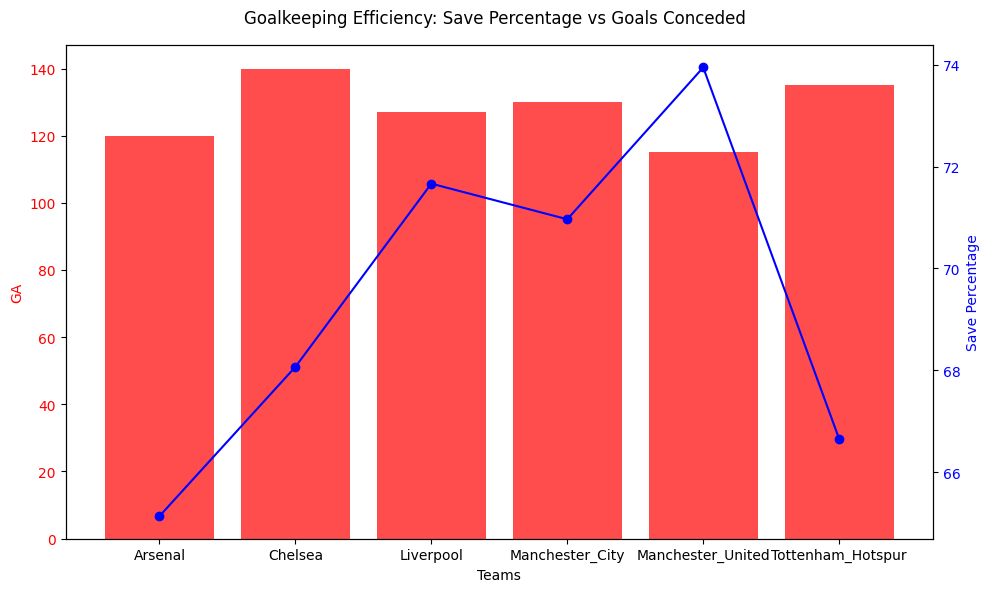

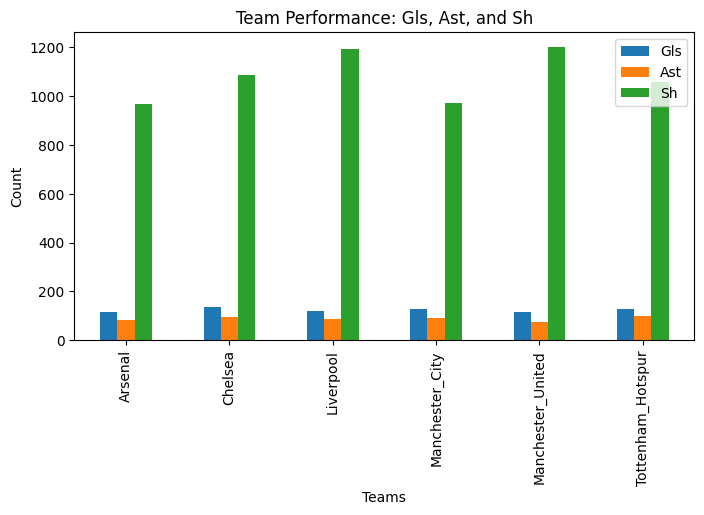

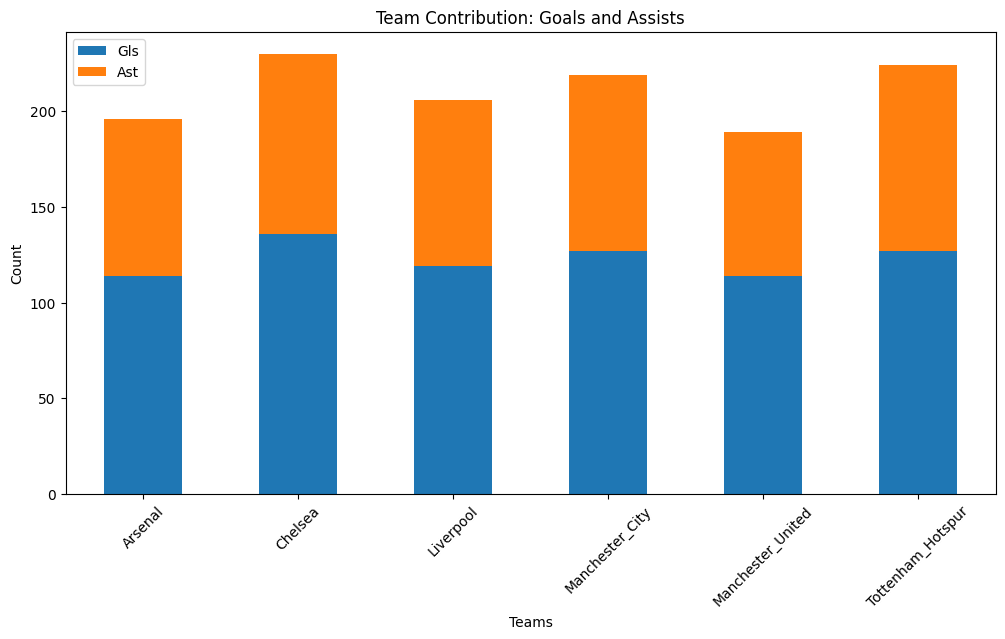

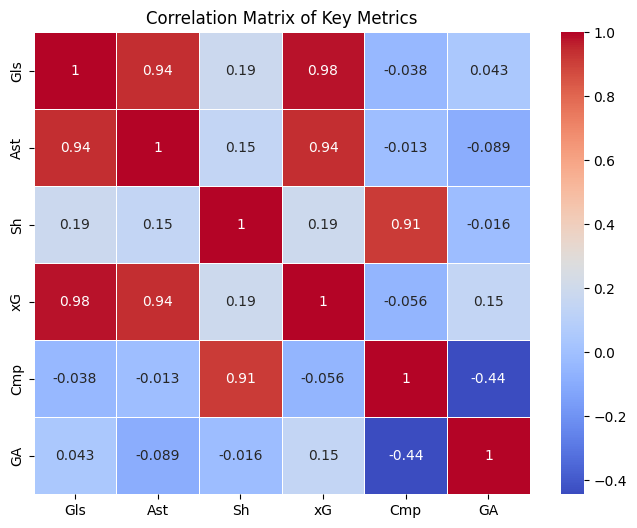

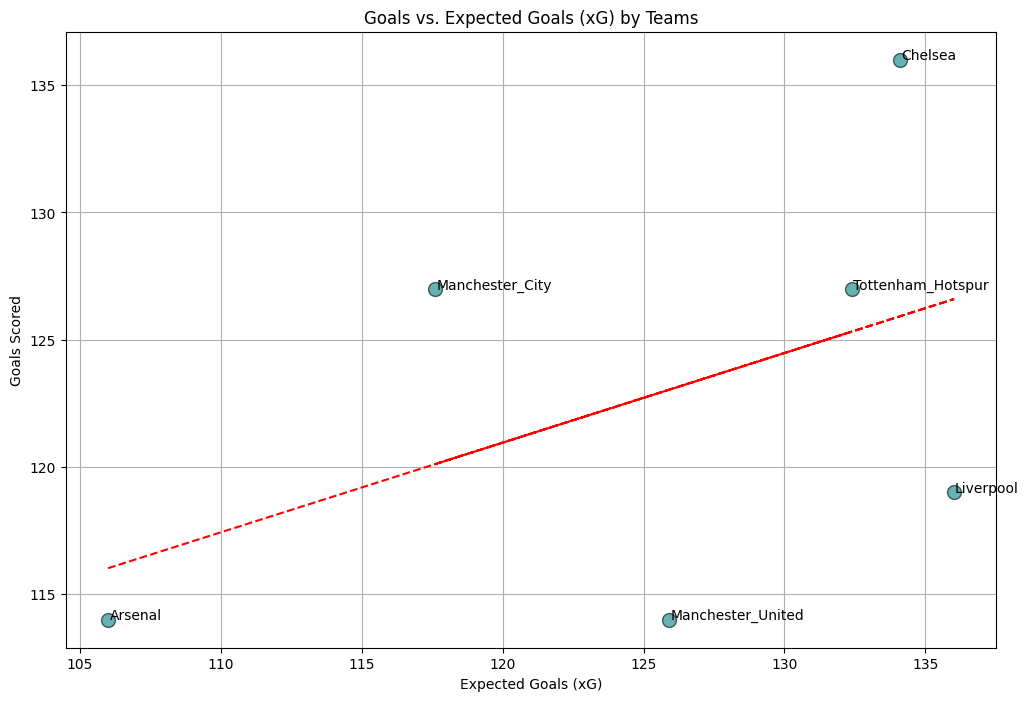

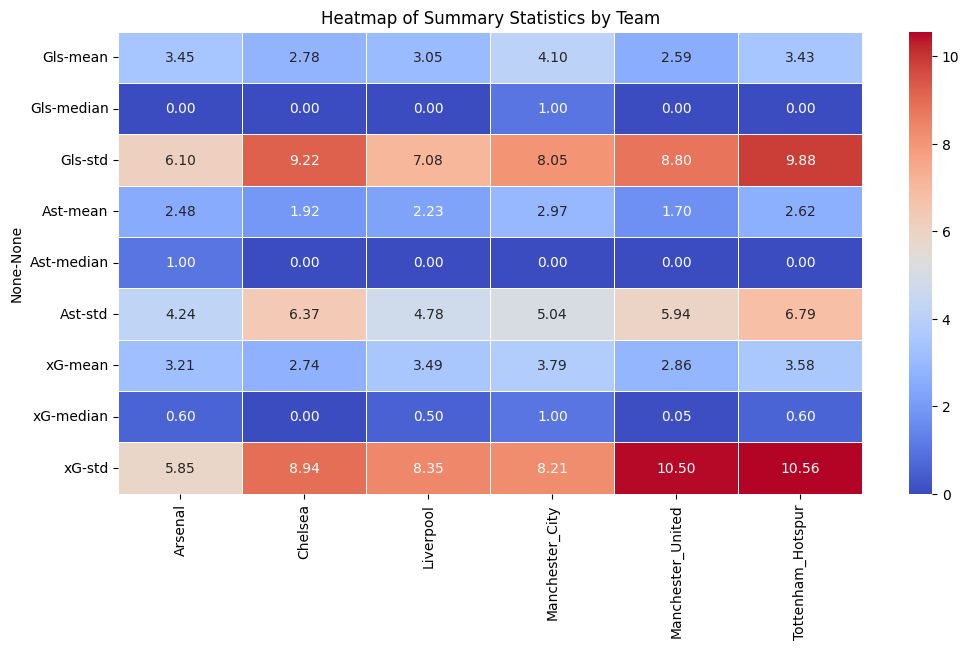

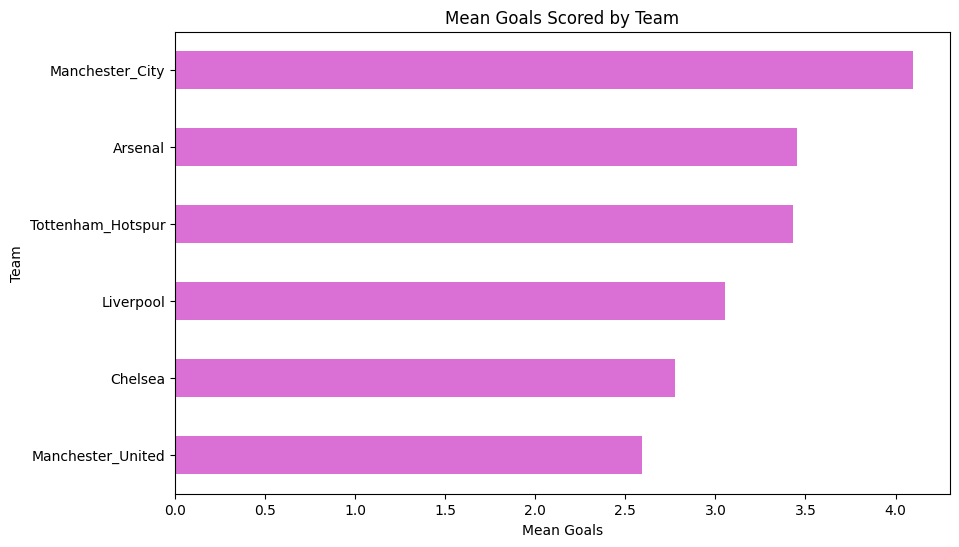

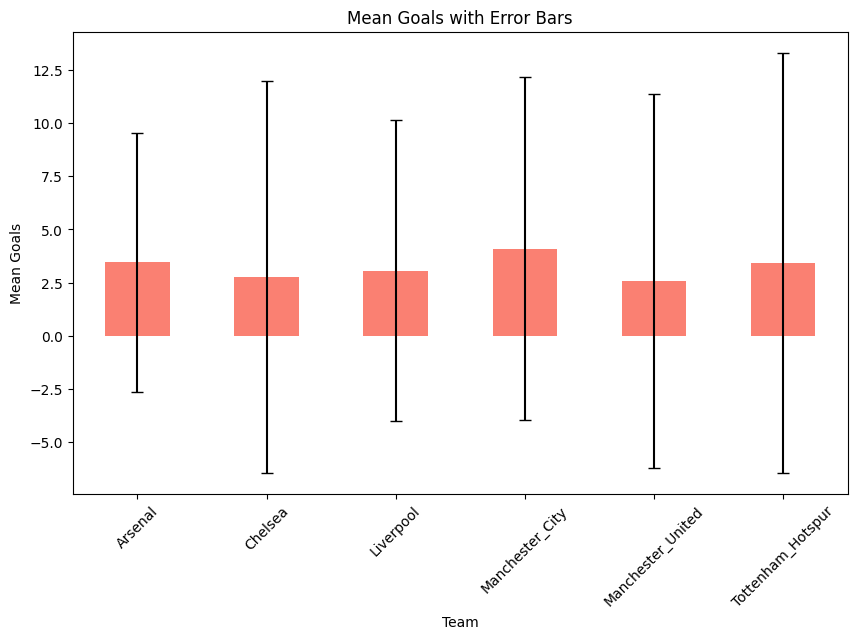

In [19]:
goalkeeping_efficiency = goalkeeping_df.groupby(level=0).agg({
    'Save%': 'mean',
    'GA': 'sum'
})

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(goalkeeping_efficiency.index, goalkeeping_efficiency['GA'], color='red', alpha=0.7, label='Goals Against')
ax1.set_xlabel('Teams')
ax1.set_ylabel('GA', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.plot(goalkeeping_efficiency.index, goalkeeping_efficiency['Save%'], color='blue', marker='o', label='Save Percentage')
ax2.set_ylabel('Save Percentage', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

fig.suptitle('Goalkeeping Efficiency: Save Percentage vs Goals Conceded')
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()

# Summarize team performance metrics
team_performance = combined_df.groupby(level=0).agg({
    'Gls': 'sum',
    'Ast': 'sum',
    'Sh': 'sum'
})

team_performance.plot(kind='bar', figsize=(8, 4))
plt.title('Team Performance: Gls, Ast, and Sh')
plt.xlabel('Teams')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()


team_performance[['Gls', 'Ast']].plot(kind='bar', stacked=True, figsize=(12, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Team Contribution: Goals and Assists')
plt.xlabel('Teams')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


import seaborn as sns

# Correlation matrix of selected metrics
metrics = ['Gls', 'Ast', 'Sh', 'xG', 'Cmp', 'GA']
team_correlation = combined_df[metrics].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(team_correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Key Metrics')
plt.show()

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'Goals' and 'xG' (Expected Goals) are in combined_df
team_stats = combined_df.groupby(level=0)[['Gls', 'xG']].sum()

plt.figure(figsize=(12, 8))
plt.scatter(team_stats['xG'], team_stats['Gls'], s=100, color='teal', alpha=0.6, edgecolor='black')

# Add trendline
z = np.polyfit(team_stats['xG'], team_stats['Gls'], 1)
p = np.poly1d(z)
plt.plot(team_stats['xG'], p(team_stats['xG']), linestyle='--', color='red')

for team in team_stats.index:
    plt.text(team_stats['xG'][team] + 0.05, team_stats['Gls'][team], team, fontsize=10)

plt.title('Goals vs. Expected Goals (xG) by Teams')
plt.xlabel('Expected Goals (xG)')
plt.ylabel('Goals Scored')
plt.grid(True)
plt.show()

# Calculate summary statistics
summary_stats = combined_df.groupby(level=0).agg({
    'Gls': ['mean', 'median', 'std'],
    'Ast': ['mean', 'median', 'std'],
    'xG': ['mean', 'median', 'std']
}).T

plt.figure(figsize=(12, 6))
sns.heatmap(summary_stats, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Summary Statistics by Team')
plt.show()


mean_goals = combined_df.groupby(level=0)['Gls'].mean().sort_values()

plt.figure(figsize=(10, 6))
mean_goals.plot(kind='barh', color='orchid')
plt.title('Mean Goals Scored by Team')
plt.xlabel('Mean Goals')
plt.ylabel('Team')
plt.show()


mean_goals = combined_df.groupby(level=0)['Gls'].mean()
std_goals = combined_df.groupby(level=0)['Gls'].std()

plt.figure(figsize=(10, 6))
mean_goals.plot(kind='bar', yerr=std_goals, capsize=4, color='salmon')
plt.title('Mean Goals with Error Bars')
plt.xlabel('Team')
plt.ylabel('Mean Goals')
plt.xticks(rotation=45)
plt.show()




In [20]:
print("Columns in combined_df before merging:")
print(combined_df.columns)


Columns in combined_df before merging:
Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast',
       ...
       'GD', 'Pts', 'Pts/MP', 'xGA', 'xGD', 'xGD/90', 'Attendance',
       'Top Team Scorer', 'Goalkeeper', 'Notes'],
      dtype='object', length=136)


In [21]:
from sklearn.impute import SimpleImputer
# Step 1: Merging DataFrames with suffixes to handle overlapping columns

full_df = combined_df.join(goalkeeping_df, how='inner', lsuffix='_combined', rsuffix='_goalkeeping')
full_df = full_df.join(scr_fix_df[['Formation']], how='inner', lsuffix='', rsuffix='_scr_fix')

# Check if 'Formation' is in full_df
print("Columns in full_df after merging:")
print(full_df.columns)

# Save the DataFrame to check manually
full_df.to_excel('/content/drive/My Drive/Project/full_df_output.xlsx', index=True)
print("Full DataFrame saved for inspection.")

arsenal_combined = full_df.loc['Arsenal']



Columns in full_df after merging:
Index(['Player_combined', 'Nation_combined', 'Pos_combined', 'Age_combined',
       'MP_combined', 'Starts_combined', 'Min_combined', '90s_combined', 'Gls',
       'Ast',
       ...
       'Thr', 'Launch%', 'AvgLen', 'Opp', 'Stp', 'Stp%', '#OPA', '#OPA/90',
       'AvgDist', 'Formation'],
      dtype='object', length=180)
Full DataFrame saved for inspection.


In [22]:
# Step 2: Feature Engineering - Selecting relevant features
# Assuming 'Formation' is in the 'scr_fix_df' and now in 'full_df'

features = full_df.drop(columns=['Formation'], axis=1)  # Drop target column from features
target = full_df['Formation']  # Target column

# Convert mixed-type columns to strings to handle mixed types
for column in features.select_dtypes(include=['object']).columns:
    features[column] = features[column].astype(str)

# Encode categorical features if any
label_encoders = {}
for column in features.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    features[column] = le.fit_transform(features[column])
    label_encoders[column] = le

# Step 3: Label Encoding for target if necessary
# If formations are categorical, encode them
target_le = LabelEncoder()
target = target_le.fit_transform(target)


In [23]:
# Step 5: Model Training
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# Step 4: Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the SVM model with a radial basis function (RBF) kernel
svm_model = SVC(kernel='rbf', C=1, gamma='auto')

# Perform 5-fold cross-validation
svm_cv_scores = cross_val_score(svm_model, features, target, cv=5, scoring='accuracy')

# Print the cross-validation results
svm_model.fit(X_train, y_train)
svm_cv_scores = cross_val_score(svm_model, features, target, cv=5)

print(f"SVM 5-fold Cross-Validation Accuracy: {svm_cv_scores.mean()}")

# Initialize the SVM model
svm_model = SVC()

SVM 5-fold Cross-Validation Accuracy: 0.3166666666666666


In [24]:
# Perform grid search with cross-validation and multiple metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_weighted',
    'recall': 'recall_weighted',
    'f1': 'f1_weighted'
}

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring=scoring, refit='accuracy')
grid_search.fit(features, target)

# Get the best cross-validation scores and corresponding metrics
best_score = grid_search.best_score_
best_results = grid_search.cv_results_

# Print the results for accuracy, precision, recall, and F1-score
print(f"Best Cross-Validation Accuracy: {best_score}")
print(f"Precision: {best_results['mean_test_precision'][grid_search.best_index_]}")
print(f"Recall: {best_results['mean_test_recall'][grid_search.best_index_]}")
print(f"F1-Score: {best_results['mean_test_f1'][grid_search.best_index_]}")

# Train the SVM model with the best parameters found by GridSearchCV
best_svm_model = SVC(**grid_search.best_params_)
best_svm_model.fit(X_train, y_train)

# Evaluate the model on the test set
svm_test_accuracy = best_svm_model.score(X_test, y_test)


# Predict on the test set and print the classification report
y_pred = best_svm_model.predict(X_test)
print("\nClassification Report for SVM on Test Set:")
print(classification_report(y_test, y_pred))


NameError: name 'param_grid' is not defined

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score,classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_validate

# Step 4: Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 5a. Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 5b. Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)


# Step 6: Model Evaluation
# 6a. Random Forest Evaluation
rf_predictions = rf_model.predict(X_test)
print("Random Forest Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))
print("Classification Report:")
print(classification_report(y_test, rf_predictions))


# 6b. Gradient Boosting Evaluation
gb_predictions = gb_model.predict(X_test)
print("\nGradient Boosting Classifier Results:")
print(f"Accuracy: {accuracy_score(y_test, gb_predictions)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, gb_predictions))
print("Classification Report:")
print(classification_report(y_test, gb_predictions))


In [ ]:
# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Perform cross-validation on the Random Forest model
rf_cv_results = cross_validate(rf_model, features, target, cv=5, scoring=scoring)

# Perform cross-validation on the Gradient Boosting model
gb_cv_results = cross_validate(gb_model, features, target, cv=5, scoring=scoring)

# Print the cross-validation results
print("Random Forest Cross-Validation Results:")
for metric in scoring.keys():
    print(f"{metric.capitalize()}: {rf_cv_results['test_' + metric].mean()}")

print("\nGradient Boosting Cross-Validation Results:")
for metric in scoring.keys():
    print(f"{metric.capitalize()}: {gb_cv_results['test_' + metric].mean()}")


In [ ]:
from sklearn.impute import SimpleImputer

# Assuming 'features' is your DataFrame containing the training data

# Step 1: Impute missing values in the training data
imputer = SimpleImputer(strategy='mean')  # or use 'median', 'most_frequent', etc.
features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)


# Step 1: Extract Arsenal's Data
arsenal_data = full_df.loc['Arsenal'].drop(columns=['Formation'])  # Drop the target column
arsenal_target = full_df.loc['Arsenal', 'Formation']  # This is just for reference, not used in prediction

# Step 2: Preprocess Arsenal's Data
# Convert any mixed-type columns in Arsenal data
for column in arsenal_data.columns:
    if arsenal_data[column].apply(lambda x: isinstance(x, str)).sum() > 0 and arsenal_data[column].apply(lambda x: isinstance(x, (int, float))).sum() > 0:
        arsenal_data[column] = arsenal_data[column].astype(str)

# Impute missing values in Arsenal data using the same imputer that was used for training
arsenal_data = pd.DataFrame(imputer.transform(arsenal_data), columns=arsenal_data.columns, index=arsenal_data.index)

# Encode categorical features in Arsenal data using the same encoders used for training
for column in arsenal_data.select_dtypes(include=['object']).columns:
    if column in label_encoders:
        arsenal_data[column] = label_encoders[column].transform(arsenal_data[column])

# Ensure that the features in Arsenal data align with those in X_train
arsenal_data = arsenal_data.reindex(columns=X_train.columns, fill_value=0)

# Step 3: Predict Formation Using the Best Model

# Reshape if necessary
arsenal_data = arsenal_data.values.reshape(1, -1)

# Predict using Random Forest
rf_arsenal_prediction = rf_model.predict(arsenal_data)
rf_arsenal_formation = target_le.inverse_transform(rf_arsenal_prediction)[0]

# Predict using Gradient Boosting
gb_arsenal_prediction = gb_model.predict(arsenal_data)
gb_arsenal_formation = target_le.inverse_transform(gb_arsenal_prediction)[0]

# Predict using SVM
svm_arsenal_prediction = best_svm_model.predict(arsenal_data)
svm_arsenal_formation = target_le.inverse_transform(svm_arsenal_prediction)[0]

# Step 4: Print the Results
print(f"\nPredicted Formation for Arsenal using Random Forest: {rf_arsenal_formation}")
print(f"Predicted Formation for Arsenal using Gradient Boosting: {gb_arsenal_formation}")
print(f"Predicted Formation for Arsenal using SVM: {svm_arsenal_formation}")

# Optional: You could also compare these predictions and choose the most frequent one or the one from the best-performing model.
